# **LEZIONE 4**

## Exercise 04.1

In Statistical Mechanics the Maxwell–Boltzmann distribution (<a href="https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution" target="_blank">Link Wikipedia</a>) is a probability distribution used for describing particle speeds in idealized gases. However, rarefied gases at ordinary temperatures behave very nearly like an ideal gas and the Maxwell–Boltzmann speed distribution is an excellent approximation for such gases. For a 3D system its formula is:
$$p(v,T) = \left( \frac{m}{2\pi k_B T} \right)^{3/2} 4\pi v^2 e^{-\frac{m v^2}{2 k_B T}}$$

By using LJ reduced units (Lenght: $\sigma$; Energy: $\epsilon$; Mass: the mass, $m$, of the particles; Temperature: $\epsilon/k_B$; velocity: $\sqrt{\epsilon/m}$) its form becomes:
$$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$

The NSL_SIMULATOR code already computes the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$.

Include the calculation of the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, inside your Molecular Dynamics code by using data blocking to obtain single block averages, progressive average values and progressive uncertainties for $p(v^*,T^*)$.

Remember that, the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, can be approximately computed as a **normalized histogram** on an appropriate interval $\left[ 0, v_{max}\right]$ and chosing the number of bins into which you want to divide this interval.

### **Soluzione**
NSL_SIMULATOR contiene l'implementazione dell'algoritmo di Verlet. Questa tecnica permette di far evolvere le posizioni delle particelle descritte nel sistema di Dinamica Molecolare, interagenti fra loro tramite il potenziale di Lennard-Jones: 
$$
V_{\text{LJ}}(r) = 4\varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right]
$$
che produce una forza
$$
F_{\text{LJ}}(r) = 24\varepsilon \left[ \frac{2(\sigma^{12})}{r^{13}} - \frac{(\sigma^6)}{r^7} \right]
$$

Verlet è un metodo di integrazione numerica: ciò significa che l'algoritmo è in grado di risolvere numericamente l'equazione differenziale
$$
\vec{r}(t + \Delta t) = 2\vec{r}(t) - \vec{r}(t - \Delta t) + \vec{a}(t)\Delta t^2
$$
aggiornando continuamente le posizioni che vengono incrementate in funzione di un incremento temporale $\Delta t$ impostato nei files di Input.

L'algoritmo non prevede l'utilizzo delle velocità per risolvere il problema, infatti nella sua formula compaiono solamente:
- posizione nuova
- posizione precedente di un $\Delta t$
- accelerazione proveniente dalla Forza di Lennard Jones


L'aggiornamento delle posizioni, permette poi di calcolare le velocità delle particelle come incremento di posizione nell'intervallo di tempo infinitesimo.
$$
\vec{v}(t) = \frac{\vec{r}(t + \Delta t) - \vec{r}(t - \Delta t)}{2 \Delta t} + O(\Delta t^2)
$$



( **Nota Tecnica**:
Per non rischiare di modificare i files necessari per i plot eseguendo per sbaglio il codice, li ho salvati con nomi diversi da quelli preimpostati andando a modificare il file system.cpp
pertanto se i files verranno cancellati non sarà possibile ottenerli nuovamente solamente ri eseguendo il codice doi c++.)

Per calcolare la distribuzione di Maxwell-Boltzmann, ho implementato le seguenti istruzioni all'interno della funzione `measure()`:
```cpp
if (_measure_pofv){
    //cout << "ok_1" << endl;
    for (int i=0; i<_npart; i++) {
      double vel = sqrt(_particle(i).getvelocity(0)*_particle(i).getvelocity(0)+
                        _particle(i).getvelocity(1)*_particle(i).getvelocity(1)+
                        _particle(i).getvelocity(2)*_particle(i).getvelocity(2) ); // arrvato a questo punto si calcola la penergy media. Infatti prende la potenziale cumulata e la divide per npart.
      
      int bin = vel/ _bin_size_v; // ogni volta ridefinisco il bin tramite la parte intera di questo quoziente in modo da aggiungere un nuovo termine al contatore.
      if( bin < _n_bins_v ){  
        _measurement(_index_pofv + bin) += 1. ;        // in questo modo nel main stiamo ottenendo ad ogni step, ovvero ad ogni iterazione nel tempo le grandezze medie.
      }
    }
  }

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

check_t = pd.read_csv("NSL_SIMULATOR/OUTPUT/temperature_check.dat", delim_whitespace=True)



Valore finale calcolato per la media mobile sugli ultimi 10000 elementi=  2.189649102


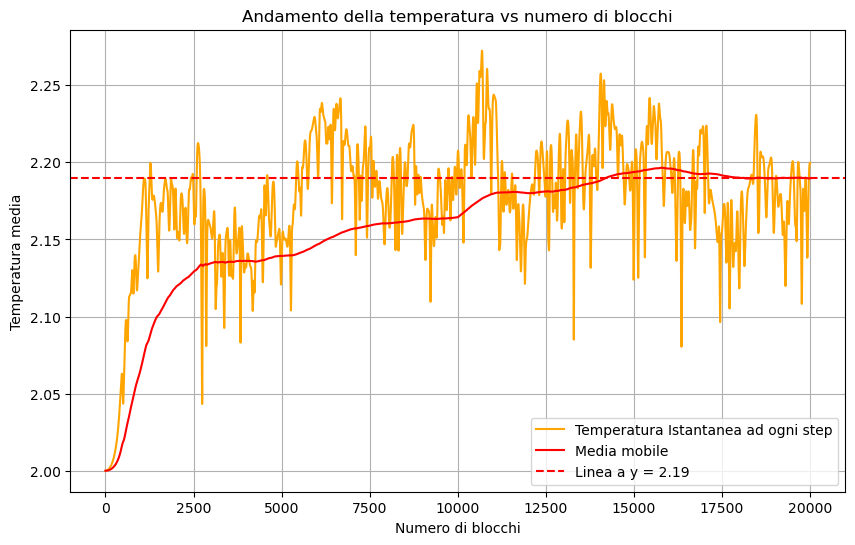

In [7]:

window_size = 10000

check_t["MA_10000"] = check_t["ACTUAL_T:"].rolling(window=window_size, min_periods=1).mean()
mean = float(check_t['MA_10000'].tail(1))
print("Valore finale calcolato per la media mobile sugli ultimi 10000 elementi= ",mean)

plt.figure(figsize=(10, 6))



# Grafico con barre d'errore
plt.plot(check_t["BLOCK:"], check_t["ACTUAL_T:"], 
              color='orange', markeredgecolor='blue', markersize =0.5,
              label="Temperatura Istantanea ad ogni step") #ho fatto 20000 blocchi da 1 solo step
plt.plot(check_t["BLOCK:"], check_t["MA_10000"], color ='r' , label="Media mobile")

# Linea orizzontale di riferimento (facoltativa)
plt.axhline(y= mean, color='red', linestyle='--', label='Linea a y = 2.19')

# Etichette e titolo
plt.xlabel("Numero di blocchi")
plt.ylabel("Temperatura media")
plt.title("Andamento della temperatura vs numero di blocchi")
plt.legend()
plt.grid(True)

plt.show()


Noto che già dopo i primi 5000 steps la Temperatura istantanea del sistema, calcolata con le velocità delle molecole, si assesta attorno al valor medio finale di $$T_{ist} \simeq 2.19$$
Ovvero il sistema già dopo i primi 5000 passi ha praticamente raggiunto un'equilibrazione.

## Exercize 4.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> ( e.g. Argon parameters: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- gas phase: $\rho^\star = 0.05$, $T^\star \sim  2.0$ (cut-off radius: $r_c = 5.0$)

starting from a <span style="color:red">**very low entropic** initial configuration</span>:
1. initial **particle positions**: <span style="color:red">fcc crystal occupying half of the simulation box in each dimension</span>
2. initial **velocity distribution**: $p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$</span> where $v_{T^*}$ is suitably connected to $T^*$. For example, this condition could be obtained by imposing that every particle has an initial velocity $\pm v_{T^*}$ for **only one** of its velocity components: $v_x$, $v_y$, $v_z$.

The goal is to show that, by evolving such initial condition via a Molecular Dynamics simulation, the velocity distribution tends to approximate the Maxwell–Boltzmann distribution.

- **Produce some pictures that show this convergence**
- The evolution of the system moves towards the increasing of entropy (more homeogeneous configuration of particles)? What would you find by changing the direction of time? Comment on these aspects in your jupyter-notebook

**Note that** the MD simulation will conserve the total energy; thus the kinetic energy and the temperature are not constant of motion ... the comparison should be done with $p(v^*,T^*_{\rm eff})$ where $T^*_{\rm eff}$ is the effective temperature obtained once the system has been equilibrated.

### Soluzione
Per evidenziare la convergenza da una distribuzione delle velocità deltiforme  ad una Maxwell Boltzmann ho deciso di utilizzare 
- 50 Blocchi 
- 30 step per blocco

In modo da evidenziare la graduale dispersione delle velocità.



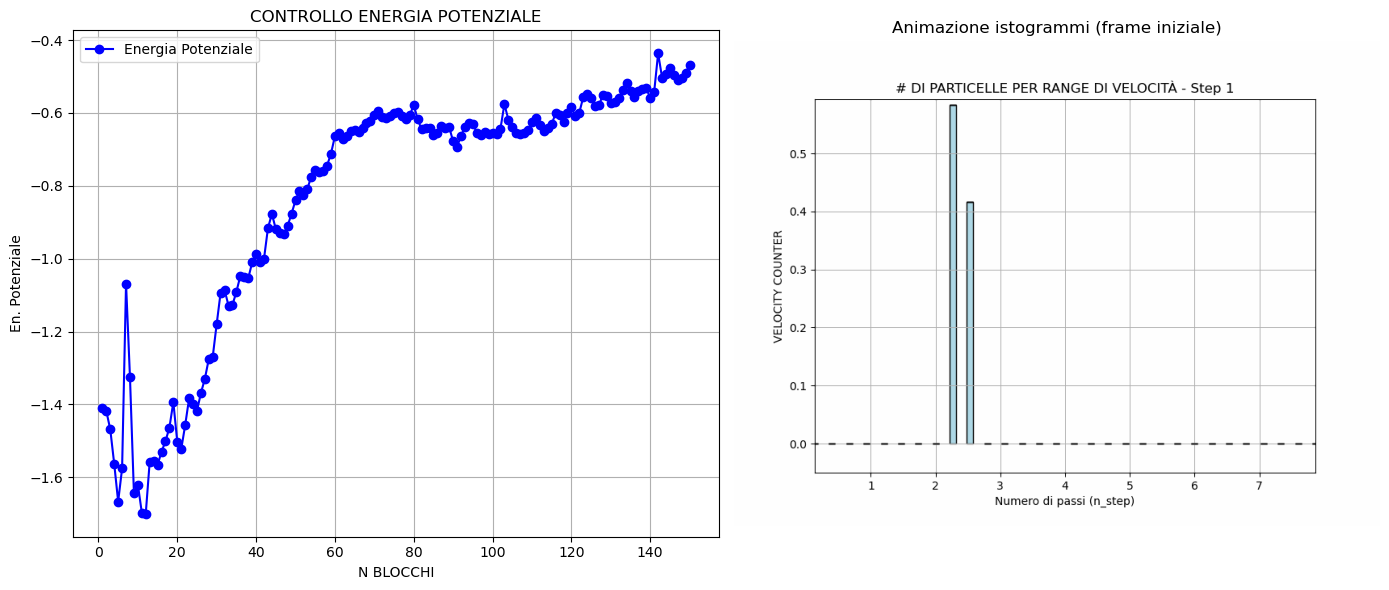

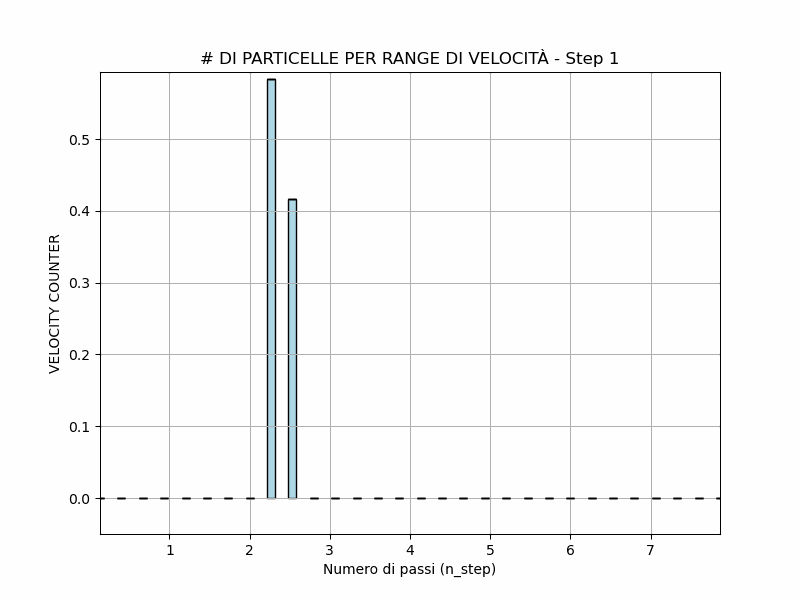

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, display
import os

# Carica dati
U = pd.read_csv("NSL_SIMULATOR/OUTPUT/FILES_4.2/potential_energy_transition.dat", sep='\s+')
df = pd.read_csv("NSL_SIMULATOR/OUTPUT/FILES_4.2/pofv_transition.dat", sep='\s+')

# Parametri
batch_size = 30
output_folder = 'immagini_frames'
os.makedirs(output_folder, exist_ok=True)
num_batches = len(df) // batch_size

# Plot energia potenziale a sinistra
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(U['BLOCK:'], U['ACTUAL_PE:'], 'o-b', label='Energia Potenziale')
axs[0].set(xlabel='N BLOCCHI', ylabel='En. Potenziale', title='CONTROLLO ENERGIA POTENZIALE')
axs[0].grid(True)
axs[0].legend()

# Genera e salva i frame per la GIF
x_min, x_max = df['VELOCITY:'].min(), df['VELOCITY:'].max()
y_min, y_max = df['AVE_POFV:'].min() - 0.05, df['AVE_POFV:'].max() + 0.01
frames = []

for i in range(num_batches):
    start, end = i * batch_size, (i + 1) * batch_size
    plt.figure(figsize=(8, 6))
    plt.bar(df['VELOCITY:'][start:end], df['AVE_POFV:'][start:end], 
            yerr=df['ERROR:'][start:end], width=0.1, capsize=3, color='lightblue', edgecolor='black')
    plt.xlabel('Numero di passi (n_step)')
    plt.ylabel('VELOCITY COUNTER')
    plt.title(f'# DI PARTICELLE PER RANGE DI VELOCITÀ - Blocco {i+1}')
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    fname = os.path.join(output_folder, f'frame_{i}.png')
    plt.savefig(fname)
    frames.append(fname)
    plt.close()

# Crea GIF
gif_filename = "istogramma_animato.gif"
imageio.mimsave(gif_filename, [imageio.imread(f) for f in frames], duration=0.5, loop=0)

# Mostra primo frame GIF a destra nel subplot
if os.path.exists(gif_filename):
    gif = imageio.mimread(gif_filename)
    axs[1].imshow(gif[0])
    axs[1].axis('off')
    axs[1].set_title('Animazione istogrammi (frame iniziale)')
else:
    axs[1].text(0.5, 0.5, 'GIF non trovata', ha='center', va='center')
    axs[1].axis('off')

plt.tight_layout()
plt.show()

# Mostra la GIF animata (per Jupyter)
display(Image(filename=gif_filename))

Aumentando il numero di step per blocchi fino al valore di 2000 steps in ogni blocco notiamo che il valore di equilibrio per temperatura ed energia è raggiunto già nei primi $\sim$ 5 blocchi per entrambe le grandezze.

L'imperfezione nella distribuzione deltiforme delle velocità iniziali è dovuta alla correzione applicata dal metodo `initialize_velocities()` tramite lo scale_factor.

Tuttavia a causa del numero limitato di step totali il sistema non raggiunge uno stato di effettivo equilibrio: nel grafico dell'energia potenziale ho plottato l'Energia Potenziale istantanea per
- 150 Blocchi
- 30 steps per blocco 

Nella figura seguente mostro l'andamento di temperatura e pressione per:
- 50 blocchi
- 1000 steps per blocco

Noto come già dopo 5 blocchi il valore delle due grandezze abbia raggiunto i valori di equilibrio, ovvero dopo un totale di $\sim 5000$ steps di evoluzione del sistema.



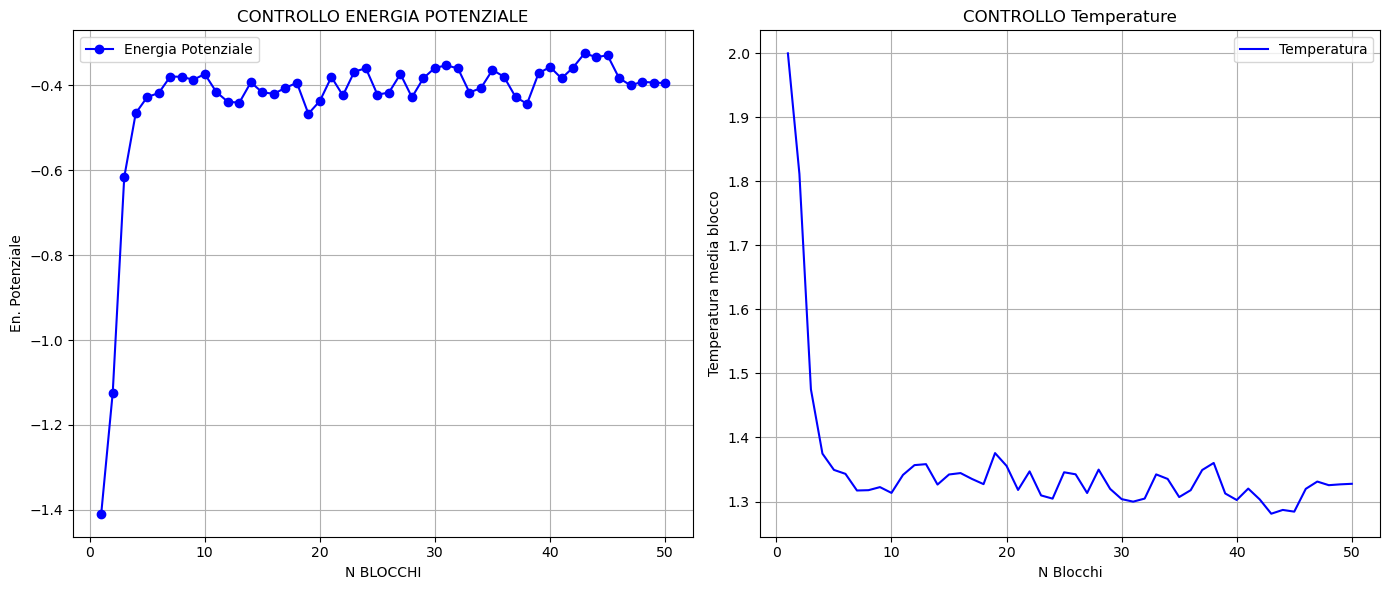

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pot_final = pd.read_csv("NSL_SIMULATOR/OUTPUT/FILES_4.2/potential_energy_final.dat", sep='\s+')
xf = pot_final['BLOCK:']
yf = pot_final['ACTUAL_PE:']

temp_final = pd.read_csv("NSL_SIMULATOR/OUTPUT/FILES_4.2/temperature_final.dat", sep='\s+')
xt = temp_final['BLOCK:']
yt = temp_final['ACTUAL_T:']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(xf, yf, color='blue', marker='o', label='Energia Potenziale')
axs[0].set_xlabel('N BLOCCHI')
axs[0].set_ylabel('En. Potenziale')
axs[0].set_title('CONTROLLO ENERGIA POTENZIALE')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(xt, yt, color='blue', label='Temperatura')
axs[1].set_xlabel('N Blocchi')
axs[1].set_ylabel('Temperatura media blocco')
axs[1].set_title('CONTROLLO Temperature')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

Ho poi eseguito nuovamente il codice utilizzando 50 blocchi da 1000 step ciascuno, in modo da ottenere una distribuzione finale delle velocità (quella dell'ultimo blocco) che fosse all'equilibrio e meno affetta da fluttuazioni statistiche rispetto a quella precedente. Ho così ottenuto un risultato più attendibile da confrontare con la distribuzione di Maxwell-Boltzmann.

Parametri fit: a = 0.1338, b = 0.3756


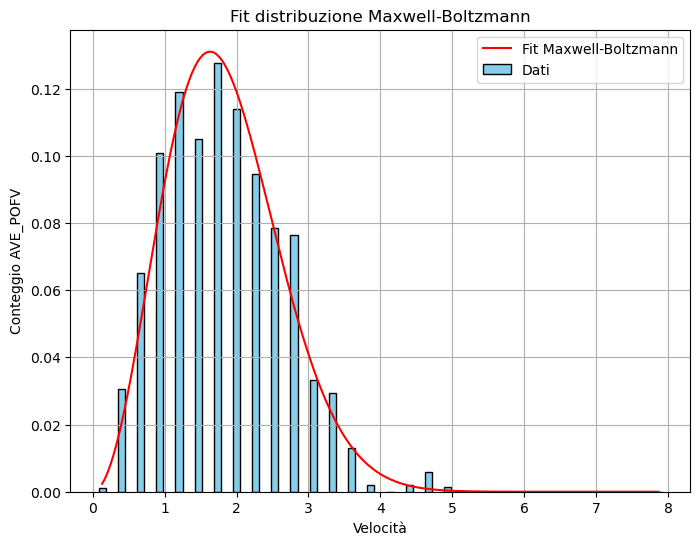

In [10]:
from scipy.optimize import curve_fit

pofv_final = pd.read_csv("NSL_SIMULATOR/OUTPUT/FILES_4.2/pofv_final.dat", sep='\s+')
pofv_last30 = pofv_final.tail(30)
xp = pofv_last30['VELOCITY:'].values
yp = pofv_last30['AVE_POFV:'].values

def maxwell_boltzmann(v, a, b):
    return a * v**2 * np.exp(-b * v**2)

initial_guess = [1, 1]

params, covariance = curve_fit(maxwell_boltzmann, xp, yp, p0=initial_guess)

a_fit, b_fit = params
print(f"Parametri fit: a = {a_fit:.4f}, b = {b_fit:.4f}")

v_fit = np.linspace(min(xp), max(xp), 200)
y_fit = maxwell_boltzmann(v_fit, a_fit, b_fit)

plt.figure(figsize=(8,6))
plt.bar(xp, yp, width=0.1, color='skyblue', edgecolor='black', label='Dati')
plt.plot(v_fit, y_fit, 'r-', label='Fit Maxwell-Boltzmann')
plt.xlabel('Velocità')
plt.ylabel('Conteggio AVE_POFV')
plt.title('Fit distribuzione Maxwell-Boltzmann')
plt.legend()
plt.grid(True)
plt.show()

Il plot mostra la distribuzione delle velocità prodotta nell'esercizio 4.2 una volta che il sistema è arrivato all'equilibrio, come dimostrato dai due grafici di Pressione e Temperatura mostrati sopra.
La linea rossa è il fit della distribuzione di Maxwell Boltzmann sui dati prodotti che ripercorre in modo piuttosto fedele la traiettoria proposta dall'istogramma.

## Exercise 04.3

Starting from the final state of an **equilibrated** MD simulation of the system in Exercise 04.2, by changing the direction of time (e.g. by inverting the final velocities, i.e. ... ), try to return back to the very low entropic initial configuration of Exercise 04.2. Is this possible? (for example, one can monitor the behavior of the average **potential energy** and the average **temperature** in **each block** as a function of time going **in both directions**. Show some picture and comment on what you find in your jupyter-notebook.

## Soluzione 
Nella risoluzione di questo esercizio si possono dare due risposte alla domanda: 
Il sistema infatti risulta essere invertibile ed invertendo la direzione del tempo può tornare alla distribuzione delle velocità deltiforme iniziale. Tuttavia questo succede solo a patto che gli step di integrazione effettuati da Verlet siano relativamente "pochi", infatti nelle immagini successive mostro come sia possibile far tornare il sistema allo stato iniziale, ma utilizzando 
- 50 blocchi
- 30 steps per ciascun blocco

Se si iniziano a fare simulazioni più complesse, step dopo step aumenterà l'errore di arrotondamento prodotto dall'approssimazione dell'algoritmo di integrazione di Verlet, e questo non permetterà più di tornare alla condizione iniziale.

Se l'algoritmo di integrazione numerica fosse perfetto e non introducesse alcuna approssimazione sarebbe invece teoricamente possibile tornare alla condizione iniziale, una volta invertita la direzione del tempo, indipendentemente dal numero di steps.

Per invertire i tempi ho implementato la seguente funzione, che invertisse la direzione delle velocità.
```cpp
//FUNZIONE FATTA DA ME PER "INVERTIRE IL TEMPO"
  void System :: reverse_time(string path){
  double xold, yold, zold;
  double x, y, z;
  ifstream cinf;
  ifstream cinfold;
  cinf.open(path + "CONFIG/conf-1.xyz");
  cinfold.open(path + "CONFIG/config.xyz");

  if(cinf.is_open() && cinfold.is_open()){
    string comment;
    string particle;
    int ncoord, ncoord1;
    cinf >> ncoord;
    cinfold >> ncoord1;
    if (ncoord != _npart || ncoord1 != _npart){
      cerr << "PROBLEM: conflicting number of coordinates in input.dat & config.xyz or conf-1.xyz not match!" << endl;
      exit(EXIT_FAILURE);
    }
    cinf >> comment;
    cinfold >> comment;
    for(int i=0; i<_npart; i++){
      //Io scambio posizione_old e posizione_new tramite i files di outpiut provenienti dalla funzione finalizze del sistema evoluto all'equilibrio
      // poi invece il calcolo della velocità e compagnia bella è messo in atto dall'algoritmo di verlet
      cinfold >> particle >> xold >> yold >> zold; // units of coordinates in conf.xyz is _side
      _particle(i).setpositold(0, this->pbc(_side(0)*xold, 0));
      _particle(i).setpositold(1, this->pbc(_side(1)*yold, 1));
      _particle(i).setpositold(2, this->pbc(_side(2)*zold, 2));
      cinf >> particle >> x >> y >> z;
      _particle(i).setposition(0, this->pbc(_side(0)*x, 0));
      _particle(i).setposition(1, this->pbc(_side(1)*y, 1));
      _particle(i).setposition(2, this->pbc(_side(2)*z, 2));
    }
  }else cerr << "PROBLEM: Unable to open INPUT file conf-1.xyz or config.xyz from ../OUTPUT/CONFIG/"<< endl;
  cinf.close();
  cinfold.close();
}

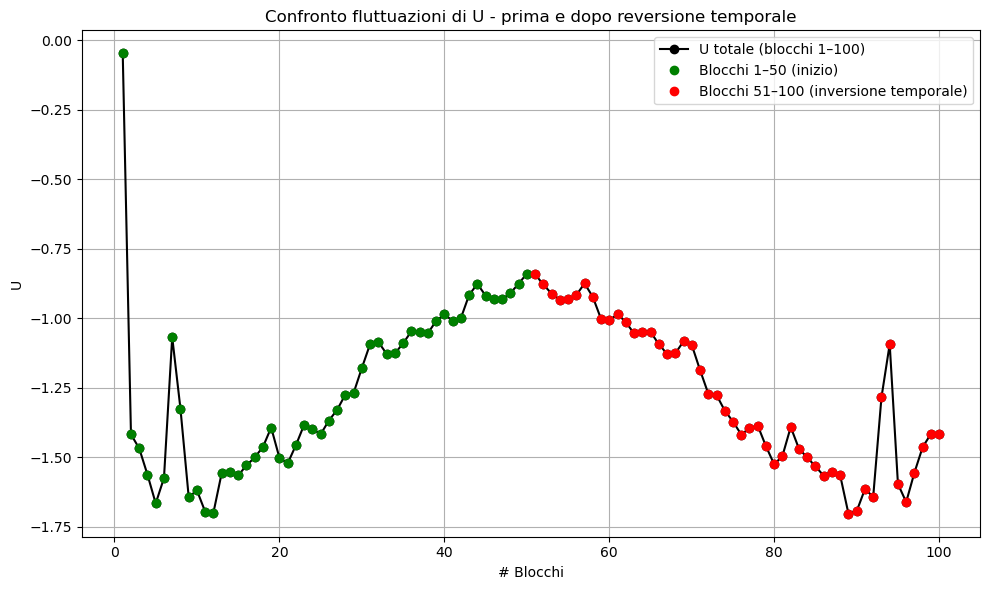

<Figure size 640x480 with 0 Axes>

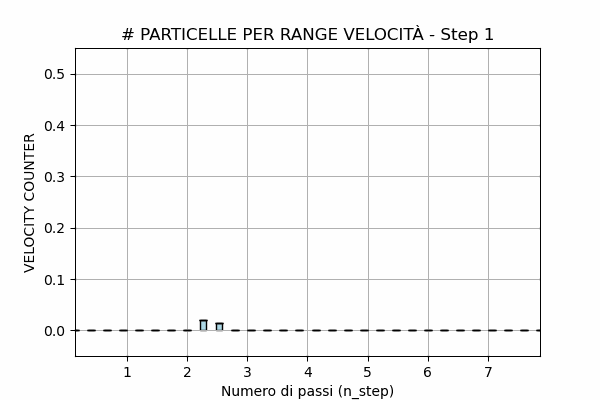

In [ ]:
pot_path = "NSL_SIMULATOR/OUTPUT/FILES_4.3/potential_energy_reverse.dat"
pot_rev = pd.read_csv(pot_path, sep='\s+')
pofv_rev = pd.read_csv("NSL_SIMULATOR/OUTPUT/FILES_4.3/pofv_reverse.dat", sep='\s+')

y = pot_rev['ACTUAL_PE:'].iloc[0:100].reset_index(drop=True)
x = range(1, 101)

batch_size = 30
output_folder = 'frames_reverse'
os.makedirs(output_folder, exist_ok=True)
frames = []

num_batches = len(pofv_rev) // batch_size

x_min = pofv_rev['VELOCITY:'].min()
x_max = pofv_rev['VELOCITY:'].max()
y_min = pofv_rev['AVE_POFV:'].min() - 0.05
y_max = pofv_rev['AVE_POFV:'].max() + 0.01

for i in range(num_batches):
    start = i * batch_size
    end = start + batch_size
    x_hist = pofv_rev['VELOCITY:'][start:end]
    y_hist = pofv_rev['AVE_POFV:'][start:end]
    yerr_hist = pofv_rev['ERROR:'][start:end]

    plt.figure(figsize=(6,4))
    plt.bar(x_hist, y_hist, yerr=yerr_hist, width=0.1, capsize=3, color='lightblue', edgecolor='black')
    plt.xlabel('Numero di passi (n_step)')
    plt.ylabel('VELOCITY COUNTER')
    plt.title(f'# PARTICELLE PER RANGE VELOCITÀ - Blocco {i+1}')
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    filename = os.path.join(output_folder, f'frame_{i}.png')
    plt.savefig(filename)
    plt.close()
    frames.append(filename)

gif_filename = "istogramma_reverse.gif"
imageio.mimsave(gif_filename, [imageio.imread(frame) for frame in frames], duration=3.0, loop=0)

plt.figure(figsize=(10,6))
plt.plot(x, y, color='black', marker='o', label='U totale (blocchi 1–100)')
plt.plot(x[:50], y[:50], color='green', marker='o', linestyle='', label='Blocchi 1–50 (inizio)')
plt.plot(x[50:], y[50:], color='red', marker='o', linestyle='', label='Blocchi 51–100 (inversione temporale)')
plt.title('Confronto fluttuazioni di U - prima e dopo reversione temporale')
plt.xlabel('# Blocchi')
plt.ylabel('U')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

display(Image(filename=gif_filename))

Il primo plot mostra l'andamento dell'energia potenziale prima e dopo la reversione temporale, essendo l'errore di arrotondamento piccolo è evidente una simmetria quasi completa nell'evoluzione in avanti per i primi 50 blocchi e all'indietro tra il 51-esim ed il 100-esimo blocco.

Nel secondo plot invece ho mostrato come sia possibile, partendo da una distribuzione delle velocità deltiforme, arrivare ald una distribuzione compatibile con quella di Maxwell-Boltzmann, per poi invertire la direzione temporale della simulazione e ritornare a quella deltiforme negli ultimi blocchi.